In [4]:
!pip install scvi-tools
!pip install scanpy
!pip install pandas

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.1/641.1 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 18.5 MB/s eta 0:00:00
 

In [1]:
import scanpy as sc
import pandas as pd
import scvi

# from google.colab import drive
# drive.mount('/content/drive')

# gene expression processing

## preprocessing

In [2]:
# data source: # https://www.biorxiv.org/content/10.1101/2025.09.11.675724v1.full - PacBio long reads
# files paths

CARMELLE_DATA_DIR = "/mnt/lareaulab/carmelle/longread_sc/lung"
AATH_DATA_DIR = "/Users/aathreyakadambi/Documents/school/berkeley/fa25/cs194/final_project/data"
AATH_LAMBDA_DATA_DIR = "/home/ubuntu/workspace/data"
DATA_DIR = AATH_LAMBDA_DATA_DIR

# sn
sn_gene = f'{DATA_DIR}/sn/GSM9135509_pb_sn_genes_count_matrix.tsv.gz'
sn_isoform = f'{DATA_DIR}/sn/GSM9135509_pb_sn_transcript_count_matrix.mtx.gz'

# sc
sc_gene = f'{DATA_DIR}/sc/GSM9135508_pb_sc_genes_count_matrix.tsv.gz'
sc_isoform = f'{DATA_DIR}/sc/GSM9135508_pb_sc_transcript_count_matrix.mtx.gz'

# cell line predictions:
# sc_cell_lines = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sc_cell_line_labels.csv'
# sn_cell_lines = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sn_cell_line_labels.csv'

In [3]:
adata_sn_gene = sc.read_csv(sn_gene).transpose()
adata_sc_gene = sc.read_csv(sc_gene).transpose()

In [4]:
adata_sn_gene, adata_sc_gene

(AnnData object with n_obs × n_vars = 10001 × 49671,
 AnnData object with n_obs × n_vars = 5002 × 50394)

In [5]:
adata_sn_gene.var_names, adata_sc_gene.var_names

(Index(['ENSG00000211952.3', 'ENSG00000211955.2', 'ENSG00000211956.2',
        'ENSG00000211957.2', 'ENSG00000211958.2', 'ENSG00000211959.2',
        'ENSG00000231475.3', 'ENSG00000238275.2', 'ENSG00000253240.1',
        'ENSG00000253325.1',
        ...
        'ENSG00000283791.1', 'ENSG00000285533.4', 'ENSG00000286756.3',
        'ENSG00000289259.2', 'ENSG00000289339.2', 'ENSG00000289740.1',
        'ENSG00000289883.1', 'ENSG00000290026.1', 'ENSG00000290061.1',
        'ENSG00000291174.1'],
       dtype='object', length=49671),
 Index(['ENSG00000212380.1', 'ENSG00000270814.1', 'ENSG00000280234.1',
        'ENSG00000211938.2', 'ENSG00000211943.2', 'ENSG00000211947.2',
        'ENSG00000211949.3', 'ENSG00000211950.2', 'ENSG00000211952.3',
        'ENSG00000211955.2',
        ...
        'ENSG00000210174.1', 'ENSG00000210176.1', 'ENSG00000210184.1',
        'ENSG00000210191.1', 'ENSG00000210194.1', 'ENSG00000210195.2',
        'ENSG00000210196.2', 'ENSG00000211459.2', 'ENSG00000212907.2'

## check some qc metrics

In [6]:
sc.pp.calculate_qc_metrics(adata_sc_gene, inplace=True)
sc.pp.calculate_qc_metrics(adata_sn_gene, inplace=True)

In [7]:
#looks good
adata_sn_gene.obs['n_genes_by_counts'].mean(), adata_sc_gene.obs['n_genes_by_counts'].mean()

(np.float64(4348.82201779822), np.float64(7170.528988404638))

## concatenate datasets

In [8]:
#add batch labels
adata_sn_gene.obs['batch'] = 'single nuclei'
adata_sc_gene.obs['batch'] = 'single cell'

In [9]:
#no repeat barcodes

adata_sn_gene.obs_names_make_unique()
adata_sc_gene.obs_names_make_unique()

#no repeat features
adata_sn_gene.var_names_make_unique()
adata_sc_gene.var_names_make_unique()

In [10]:
genes_combined = sc.concat([adata_sc_gene, adata_sn_gene],
                   join='inner',
                   label='dataset',
                   keys=['single cell', 'single nuclei'])

/home/ubuntu/.local/share/mamba/envs/aath_lambda_basic/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
# reading in cell lines
sc_cell_lines_path = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sc_cell_line_labels.csv'
sn_cell_lines_path = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sn_cell_line_labels.csv'

sc_cell_lines = pd.read_csv(sc_cell_lines_path)
sn_cell_lines = pd.read_csv(sn_cell_lines_path)

combined_cell_lines = pd.concat([sc_cell_lines, sn_cell_lines])

# Ensure unique cell_id entries in combined_cell_lines before mapping
combined_cell_lines.drop_duplicates(subset=['cell_id'], inplace=True)

# Filter for correlation > 0.4
filtered_cell_lines = combined_cell_lines[combined_cell_lines['correlation'] > 0.4]

# Create a mapping series with cell_id as index
cell_line_map = filtered_cell_lines.set_index('cell_id')['assigned_cell_line']

# Map the cell lines to the genes_combined observations using the index (barcode)
genes_combined.obs['cell_line'] = genes_combined.obs.index.map(cell_line_map)

# Replace NaN with "Unknown"
genes_combined.obs['cell_line'] = genes_combined.obs['cell_line'].fillna('Unknown')

# Display the first few rows to verify
display(genes_combined.obs.head())

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,batch,dataset,cell_line
AACAAGAGTGCCGGTT,10203,9.230535,53044.0,10.878896,19.668577,26.623181,34.307367,45.630043,single cell,single cell,H2228
ACAACCAGTTCCTAGA,12122,9.402860,57040.0,10.951526,11.279804,16.640954,23.318724,33.792076,single cell,single cell,H69
ACCATTTCACAAGCTT,10260,9.236106,63070.0,11.052016,18.187728,24.420485,32.473442,44.133502,single cell,single cell,H2228
ACTACGAAGTTCGGTT,5441,8.601902,15845.0,9.670672,23.792995,30.255601,37.595456,49.441464,single cell,single cell,H211
ACTTAGGAGCCTATCA,14052,9.550591,85072.0,11.351265,12.052144,16.168657,21.732180,32.075183,single cell,single cell,H69


In [11]:
#no repeat barcodes in integrated dataset

genes_combined.obs_names_make_unique()

In [17]:
genes_combined.obs['cell_line'].value_counts()

,count
cell_line,
H2228,3043
H1975,2804
HCC827,2498
SHP77,1638
Unknown,1189
H146,1123
H211,1049
H69,1027
H526,632


In [12]:
sc.pp.filter_cells(genes_combined, min_genes=100)
sc.pp.filter_genes(genes_combined, min_cells=3)

#print after filtering
genes_combined

AnnData object with n_obs × n_vars = 15003 × 46294
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'batch', 'dataset', 'n_genes'
    var: 'n_cells'

In [13]:
# run scvi on raw counts
genes_combined.layers['counts'] = genes_combined.X

In [17]:
genes_combined.write_h5ad('/content/drive/MyDrive/Colab Notebooks/Project/isoforms_combined_cell_line.h5ad')

## visualize without correcting for batch effect

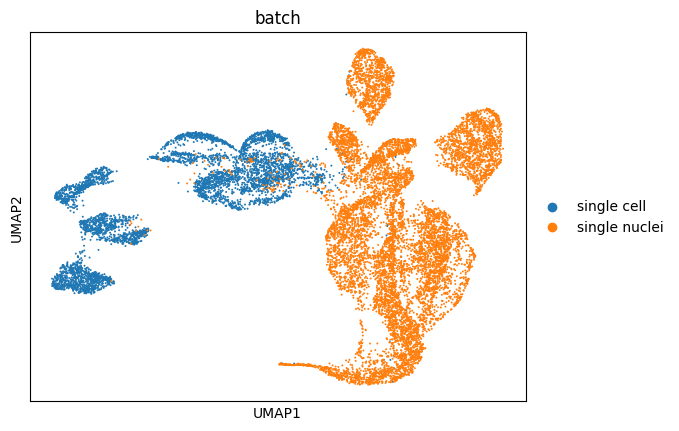

In [14]:
sc.tl.pca(genes_combined)
sc.pp.neighbors(genes_combined, n_pcs=30, n_neighbors=15)
sc.tl.umap(genes_combined, min_dist=0.3)
sc.pl.umap(genes_combined, color=['batch'], wspace=0.55)

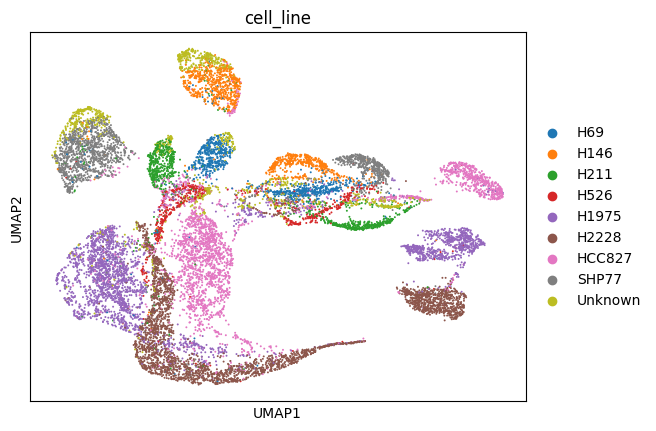

In [ ]:
sc.pl.umap(genes_combined, color=['cell_line'], wspace=0.55)

## Gene scANVI

In [ ]:
scvi.model.SCANVI.setup_anndata(
    genes_combined,
    layer="counts",
    batch_key="batch",
    labels_key = "cell_line",
    unlabeled_category= "unknown"
)

In [ ]:
model_gene = scvi.model.SCANVI(
    genes_combined,
    n_latent = 20,
    n_layers = 2,
)
model_gene

ScanVI Model with the following params: 
unlabeled_category: unknown, n_hidden: 128, n_latent: 20, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb
Training status: Not Trained
Model's adata is minified?: False

In [ ]:
model_gene.train(max_epochs=200,
    accelerator="gpu",
    )

INFO     Training for 200 epochs.                                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1551: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return _C._get_float32_matmul_precision()
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly uti

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [ ]:
SCANVI_LATENT_KEY = "X_scANVI"

latent = model_gene.get_latent_representation()
genes_combined.obsm[SCANVI_LATENT_KEY] = latent
latent.shape

(15003, 20)

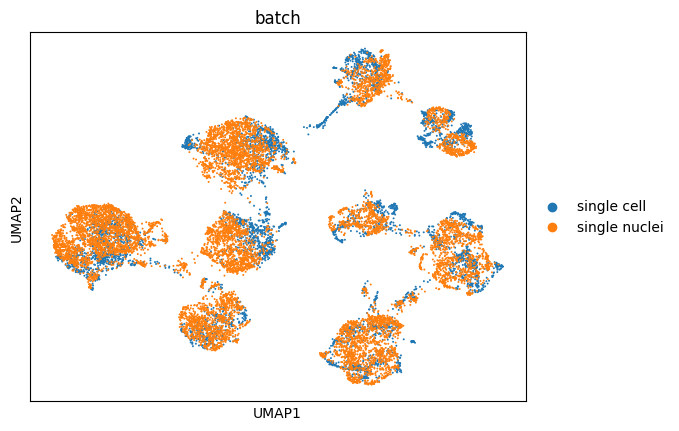

In [ ]:
sc.pp.neighbors(genes_combined, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(genes_combined, min_dist=0.3)
sc.pl.umap(genes_combined, color=['batch'], wspace=0.55)

## integrated gene expression data

In [ ]:
genes_combined.obs['n_genes_by_counts'].mean()

np.float64(5289.579084183163)

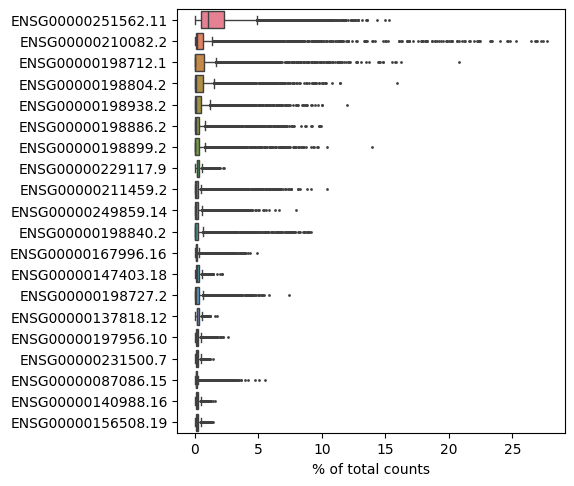

In [ ]:
sc.pl.highest_expr_genes(genes_combined, n_top=20)

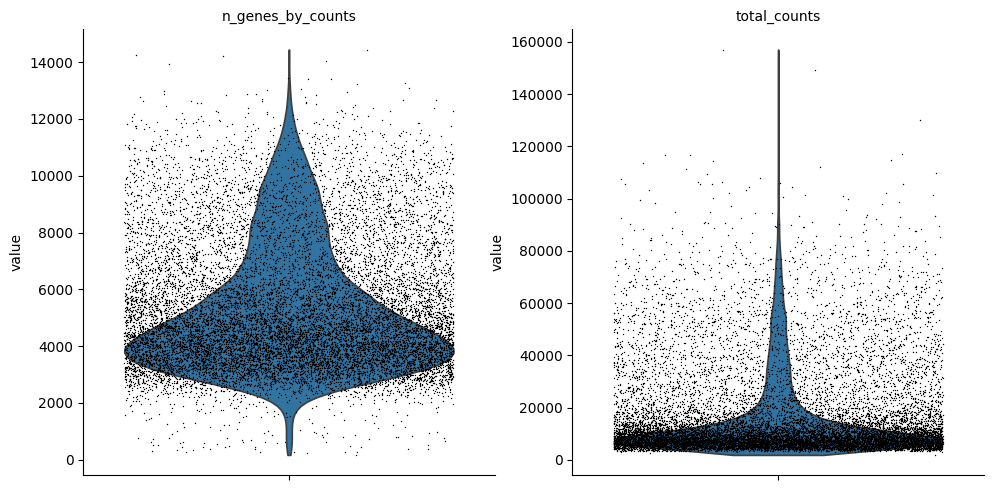

In [ ]:
sc.pl.violin(
    genes_combined,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)

## leiden

In [ ]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 118.3 MB/s eta 0:00:00


In [ ]:
sc.tl.leiden(genes_combined, resolution=0.3, flavor = "igraph")

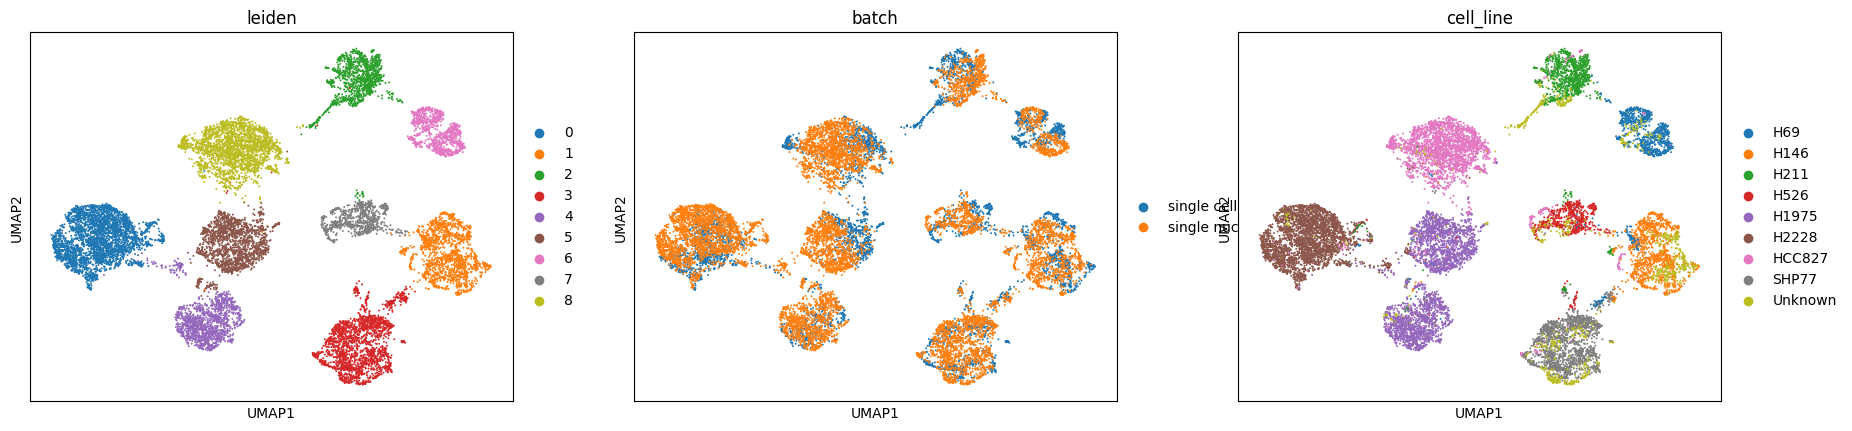

In [ ]:
#visualize

sc.pl.umap(genes_combined, color=['leiden', 'batch', 'cell_line'])

In [ ]:
genes_combined.write_h5ad('anscvi_integrated_sc_sn_gene-exp.h5ad')

#Gene scVI

In [17]:
genes_combined_2 = genes_combined

In [18]:
scvi.model.SCVI.setup_anndata(
    genes_combined_2,
    layer="counts",
    batch_key="batch",
)

In [19]:
model_gene_scVI = scvi.model.SCVI(
    genes_combined_2,
    n_latent = 20,
    n_layers = 2,
)
model_gene_scVI

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 20, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [20]:
model_gene_scVI.train(max_epochs=200,
    accelerator="gpu",
    )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1551: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return _C._get_float32_matmul_precision()
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly uti

Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: 
Detected KeyboardInterrupt, attempting graceful shutdown ...
INFO:lightning.pytorch.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Exception raised during training. <class 'NameError'> 1
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/call.py", line 49, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/trainer.py", line 630, in _fit_impl
    self._run(model, ckpt_path=ckpt_path, weights_only=weights_only)
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/trainer.py", line 1079, in _run
    results = self._run_stage()
              ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/trainer.py", line 1123, in _run_stage
    self.fit_loop.run()
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py", line 217, in run
    self.advance()
  File "/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py", line 465, in ad

TypeError: object of type 'NoneType' has no len()

In [ ]:
SCVI_LATENT_KEY = "X_scVI"

latent = model_gene_scVI.get_latent_representation()
genes_combined.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(15003, 20)

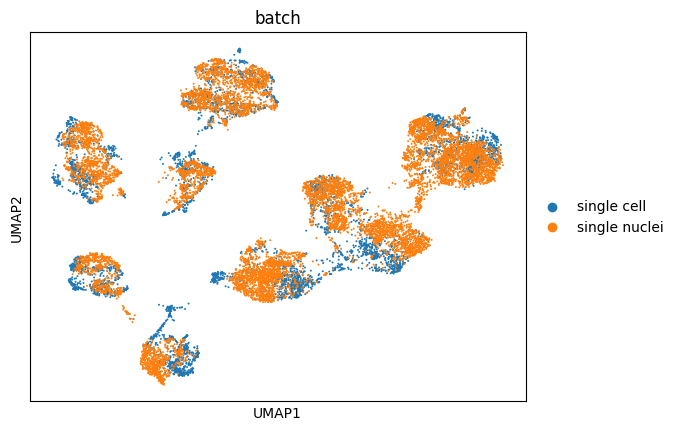

In [ ]:
sc.pp.neighbors(genes_combined_2, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(genes_combined_2, min_dist=0.3)
sc.pl.umap(genes_combined_2, color=['batch'], wspace=0.55)

In [ ]:
sc.tl.leiden(genes_combined_2, resolution=0.3, flavor = "igraph")

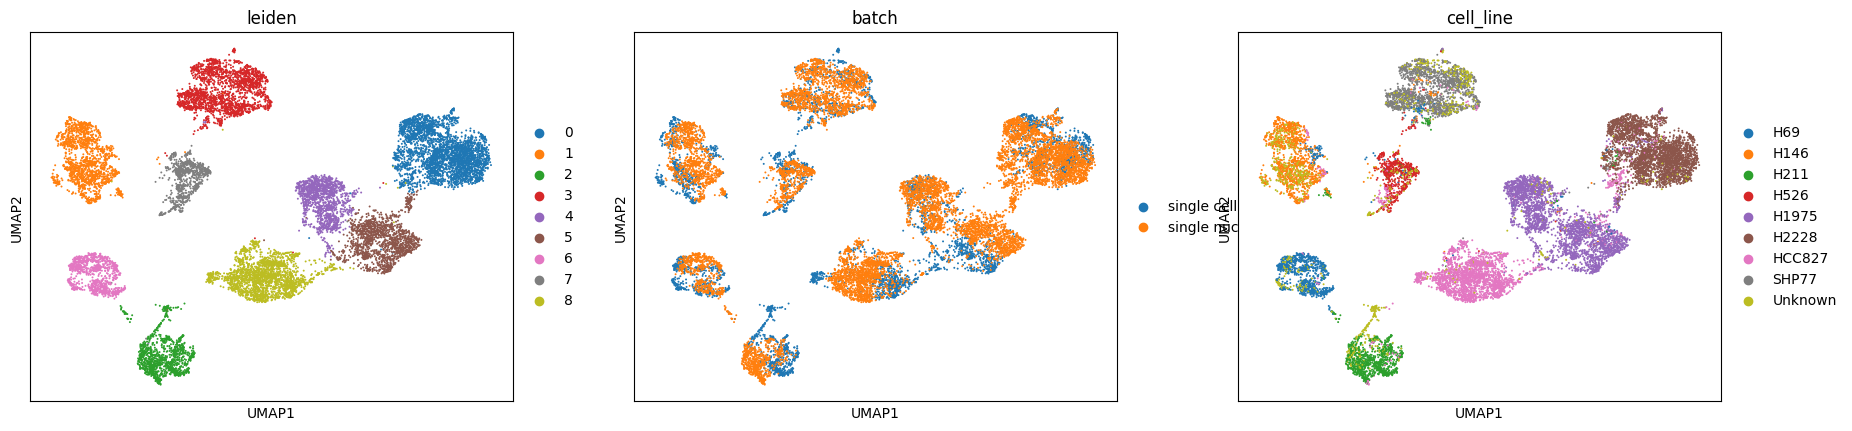

In [ ]:
#visualize

sc.pl.umap(genes_combined_2, color=['leiden', 'batch', 'cell_line'])

In [ ]:
genes_combined_2.write_h5ad('scvi_integrated_sc_sn_gene-exp.h5ad')

# mrVI gene integration

In [38]:
genes_combined_3 = genes_combined
sample_key = "cell_line"

import os
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import seaborn as sns
from scvi.external import MRVI

In [ ]:
MRVI.setup_anndata(
    genes_combined_3,
    layer="counts",
    batch_key="batch",
    sample_key="cell_line",
    backend="torch"
)

/tmp/ipython-input-55070724.py:1: UserWarning: MRVI model is being setup with PyTorch backend
  MRVI.setup_anndata(


In [31]:
model_gene_mrVI = scvi.model.SCVI(
    genes_combined_2,
    n_latent = 20,
    n_layers = 2,
)
model_gene_mrVI

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 20, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [34]:
model_gene_mrVI.train(max_epochs=200,
    accelerator="gpu",
    )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/200 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [35]:
SCVI_LATENT_KEY = "X_mrVI"

latent = model_gene_mrVI.get_latent_representation()
genes_combined.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(15003, 20)

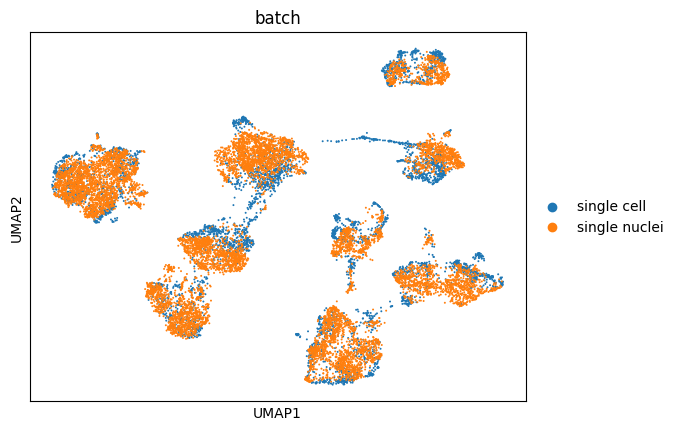

In [36]:
sc.pp.neighbors(genes_combined_3, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(genes_combined_3, min_dist=0.3)
sc.pl.umap(genes_combined_3, color=['batch'], wspace=0.55)

In [38]:
!pip install leidenalg
sc.tl.leiden(genes_combined_3, resolution=0.3, flavor = "igraph")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 146.9 MB/s eta 0:00:00


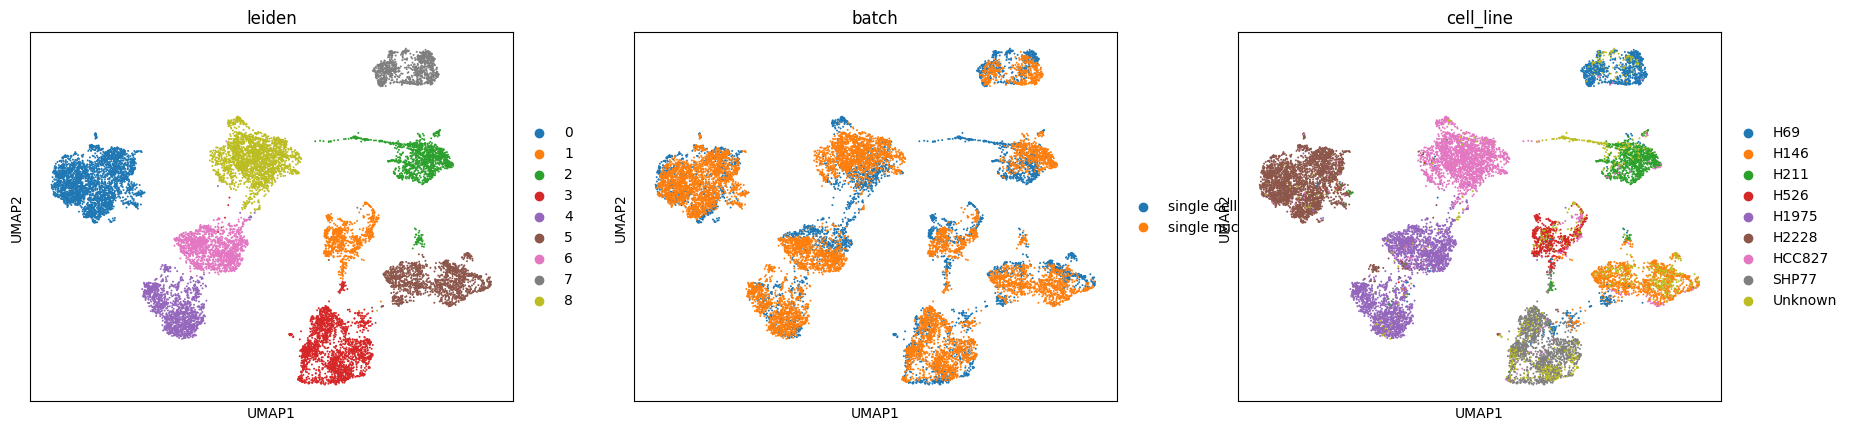

In [41]:
sc.pl.umap(genes_combined_2, color=['leiden', 'batch', 'cell_line'])

In [42]:
genes_combined.write_h5ad('/content/drive/MyDrive/Colab Notebooks/Project/mrVI_integrated_sc_sn_gene-exp.h5ad', compression='gzip')

# add isoform expression

## preprocessing

In [20]:
adata_sn_isoform = sc.read_mtx(sn_isoform)
adata_sc_isoform = sc.read_mtx(sc_isoform)

In [21]:
adata_sn_isoform, adata_sc_isoform

(AnnData object with n_obs × n_vars = 10001 × 127013,
 AnnData object with n_obs × n_vars = 5002 × 128580)

In [22]:
sn_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/sn/GSM9135509_pb_sn_transcript_count_features.tsv.gz', header=None)[0].tolist()
sn_cells = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/sn/GSM9135509_pb_sn_transcript_count_barcodes.tsv.gz', header=None)[0].tolist()

In [23]:
sc_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/sc/GSM9135508_pb_sc_transcript_count_features.tsv.gz', header=None)[0].tolist()
sc_cells = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/sc/GSM9135508_pb_sc_transcript_count_barcodes.tsv.gz', header=None)[0].tolist()

In [24]:
adata_sn_isoform.var_names = sn_features
adata_sn_isoform.obs_names = sn_cells

In [25]:
adata_sc_isoform.var_names = sc_features
adata_sc_isoform.obs_names = sc_cells

In [26]:
adata_sc_isoform.var_names[:10], adata_sc_isoform.obs_names[:10]

(Index(['ENST00000456328.2', 'ENST00000473358.1', 'ENST00000469289.1',
        'ENST00000606857.1', 'ENST00000442987.3', 'ENST00000496488.1',
        'ENST00000669836.1', 'ENST00000635159.1', 'ENST00000423796.1',
        'ENST00000416931.1'],
       dtype='object'),
 Index(['AAACCCAAGCCTGACC', 'AAACCCACAACTCATG', 'AAACCCACATCTAACG',
        'AAACCCATCAACCTTT', 'AAACGAAGTCATAACC', 'AAACCCAAGAACTCCT',
        'AAACCCACATCATCTT', 'AAACCCAGTCCACAGC', 'AAACGAAAGTGGGAAA',
        'AAACGAATCTTAGCTT'],
       dtype='object'))

In [27]:
adata_sn_isoform.var_names[:10], adata_sn_isoform.obs_names[:10]

(Index(['ENST00000456328.2', 'ENST00000642116.1', 'ENST00000641515.2',
        'ENST00000442987.3', 'ENST00000496488.1', 'ENST00000669836.1',
        'ENST00000635159.1', 'ENST00000432723.3', 'ENST00000423796.1',
        'ENST00000416931.1'],
       dtype='object'),
 Index(['AAACCCACAACCGACC', 'AAACCCACATCCGAGC', 'AAACCCAGTACAGAAT',
        'AAACCCAAGTTAACAG', 'AAACCCAGTAGCTGCC', 'AAACCCATCTAGTACG',
        'AAACCCAGTTCCACAA', 'AAACGAAAGCGTCTCG', 'AAACCCAGTCGCACAC',
        'AAACGAAAGTTCTCTT'],
       dtype='object'))

## check some qc metrics

In [28]:
sc.pp.calculate_qc_metrics(adata_sc_isoform, inplace=True)
sc.pp.calculate_qc_metrics(adata_sn_isoform, inplace=True)

In [29]:
adata_sn_isoform, adata_sc_isoform

(AnnData object with n_obs × n_vars = 10001 × 127013
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 AnnData object with n_obs × n_vars = 5002 × 128580
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts')

In [30]:
# isoforms looks okay... similar mean counts per dataset. slightly higher?
adata_sn_isoform.obs['n_genes_by_counts'].mean(), adata_sc_isoform.obs['n_genes_by_counts'].mean()

(np.float64(3751.223177682232), np.float64(8877.744102359056))

In [31]:
#add batch labels
adata_sn_isoform.obs['batch'] = 'single nuclei'
adata_sc_isoform.obs['batch'] = 'single cell'


In [32]:
#no repeat barcodes
adata_sn_isoform.obs_names_make_unique()
adata_sc_isoform.obs_names_make_unique()

#no repeat features
adata_sn_isoform.var_names_make_unique()
adata_sc_isoform.var_names_make_unique()

isoforms_combined = sc.concat([adata_sc_isoform, adata_sn_isoform],
                   join='inner',
                   label='dataset',
                   keys=['single cell', 'single nuclei'])

# filtering
sc.pp.filter_cells(isoforms_combined, min_genes=100)
sc.pp.filter_genes(isoforms_combined, min_cells=3)


/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
# for running scVI on counts
isoforms_combined.layers['counts'] = isoforms_combined.X

# cell_line for Isoform

In [36]:
# reading in cell lines
sc_cell_lines_path = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sc_cell_line_labels.csv'
sn_cell_lines_path = '/content/drive/MyDrive/Colab Notebooks/Project/data/longbench_data/cell_line_labels/sn_cell_line_labels.csv'

sc_cell_lines = pd.read_csv(sc_cell_lines_path)
sn_cell_lines = pd.read_csv(sn_cell_lines_path)

combined_cell_lines = pd.concat([sc_cell_lines, sn_cell_lines])

# Ensure unique cell_id entries in combined_cell_lines before mapping
combined_cell_lines.drop_duplicates(subset=['cell_id'], inplace=True)

# Filter for correlation > 0.4
filtered_cell_lines = combined_cell_lines[combined_cell_lines['correlation'] > 0.4]

# Create a mapping series with cell_id as index
cell_line_map = filtered_cell_lines.set_index('cell_id')['assigned_cell_line']

# Map the cell lines to the genes_combined observations using the index (barcode)
isoforms_combined.obs['cell_line'] = isoforms_combined.obs.index.map(cell_line_map)

# Replace NaN with "Unknown"
isoforms_combined.obs['cell_line'] = isoforms_combined.obs['cell_line'].fillna('Unknown')

# Display the first few rows to verify
display(isoforms_combined.obs.head())

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,batch,dataset,n_genes,cell_line
AAACCCAAGCCTGACC,10178,9.228082,19269.000000,9.866304,54.007835,56.696087,59.815557,65.527326,single cell,single cell,9585,HCC827
AAACCCACAACTCATG,6526,8.783703,13748.000000,9.528722,32.815636,40.092025,47.955049,59.120100,single cell,single cell,6245,H211
AAACCCACATCTAACG,4323,8.371936,4810.000000,8.478661,26.597577,34.690491,42.990812,56.561744,single cell,single cell,4102,H146
AAACCCATCAACCTTT,3349,8.116716,3205.000000,8.072780,23.139882,29.001260,36.441738,49.597710,single cell,single cell,3156,H146
AAACGAAGTCATAACC,5894,8.681860,11736.000977,9.370502,63.581369,65.589266,68.317968,73.588822,single cell,single cell,5566,HCC827


## scVI on isoform data

In [42]:
scvi.model.SCVI.setup_anndata(
    isoforms_combined,
    layer="counts",
    batch_key="batch",
    categorical_covariate_keys=["cell_line"]
)

/usr/local/lib/python3.12/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [43]:
model_isoform_scVI = scvi.model.SCVI(
    isoforms_combined,
    n_latent = 20,
    n_layers = 2,
)
model_isoform_scVI

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 20, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [ ]:
model_isoform_scVI.train(max_epochs=500,
    accelerator="gpu",
    )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1551: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return _C._get_float32_matmul_precision()
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly uti

Training:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the 

In [ ]:
SCVI_LATENT_KEY = "X_scVI"

latent = model_isoform_scVI.get_latent_representation()
isoforms_combined.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(15003, 20)

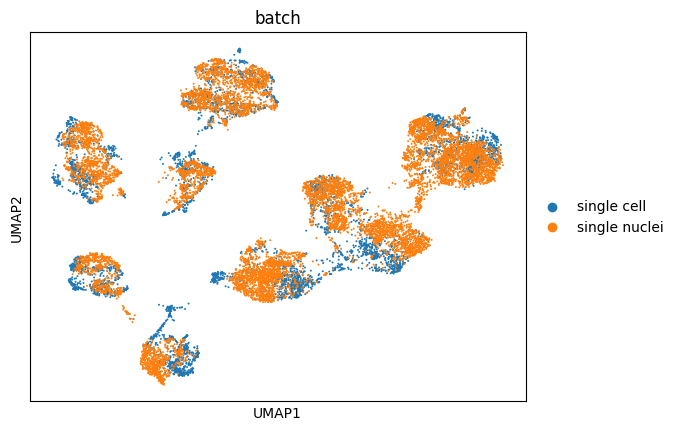

In [ ]:
sc.pp.neighbors(isoforms_combined, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(isoforms_combined, min_dist=0.3)
sc.pl.umap(isoforms_combined, color=['batch'], wspace=0.55)

In [ ]:
sc.tl.leiden(isoforms_combined, resolution=0.3, flavor = "igraph")

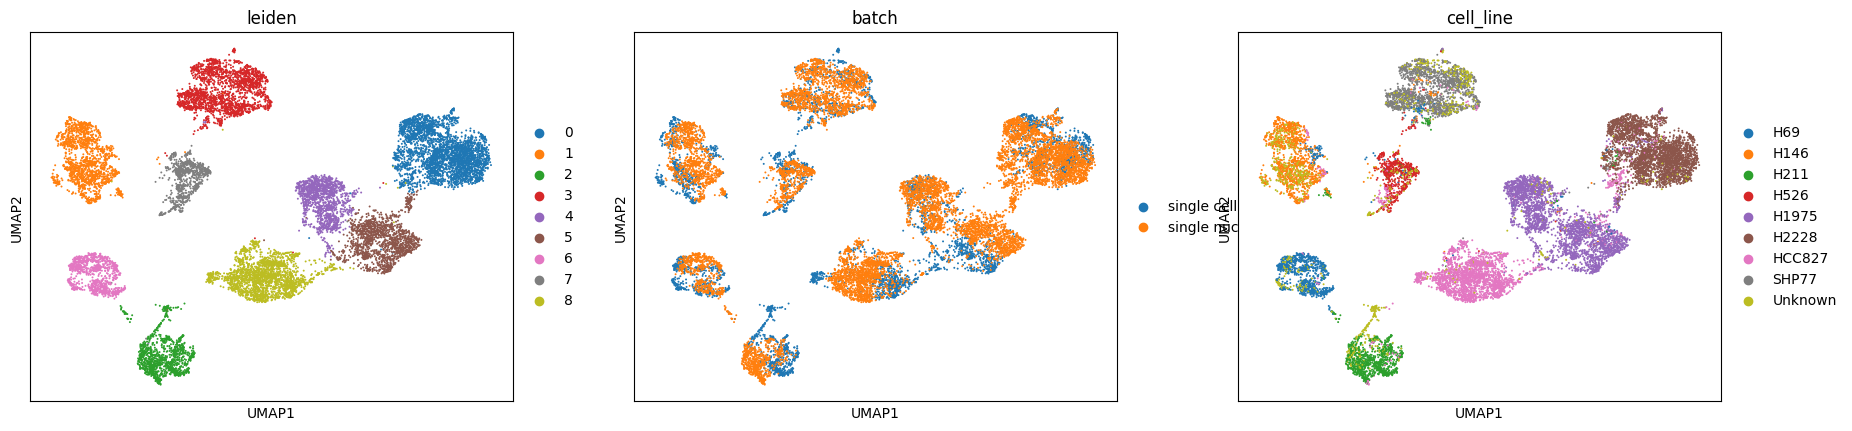

In [ ]:
#visualize

sc.pl.umap(isoforms_combined, color=['leiden', 'batch', 'cell_line'])

In [ ]:
isoforms_combined.write_h5ad('scvi_integrated_sc_sn_isoform-exp.h5ad')

#single cell isoform

In [ ]:
scvi.model.SCVI.setup_anndata(
    adata_sc_isoform,
    layer="counts",
    batch_key="batch",
)

/usr/local/lib/python3.12/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [ ]:
model_sc_iso = scvi.model.SCVI(
    adata_sc_isoform,
    n_latent = 20,
    n_layers = 1
)
model_sc_iso

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 20, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [ ]:
model_sc_iso.train(max_epochs=200,
            accelerator="gpu",
            )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the 

In [ ]:
SCVI_LATENT_KEY = "X_scVI"

latent = model_sc_iso.get_latent_representation()
adata_sc_isoform.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(5002, 20)

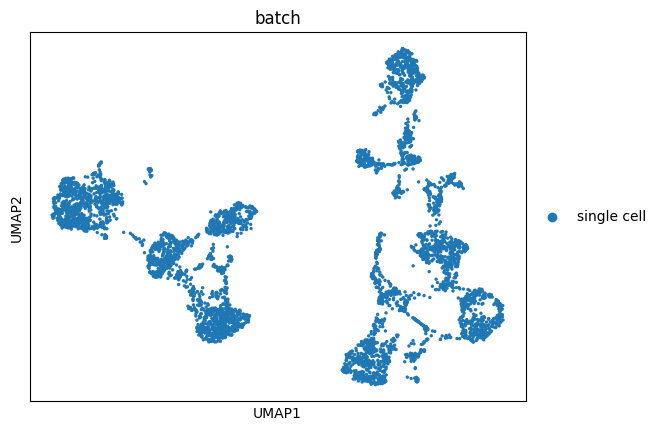

In [ ]:
sc.pp.neighbors(adata_sc_isoform, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata_sc_isoform, min_dist=0.3)
sc.pl.umap(adata_sc_isoform, color=['batch'], wspace=0.55)

In [ ]:
adata_sc_isoform.write_h5ad('adata_sc_isoform-exp.h5ad')

#single nuclei isoform

In [ ]:
scvi.model.SCVI.setup_anndata(
    adata_sn_isoform,
    layer="counts",
    batch_key="batch",
)

/usr/local/lib/python3.12/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [ ]:
model_sn_iso = scvi.model.SCVI(
    adata_sn_isoform,
    n_latent= 20,
    n_layers = 1
)
model_sn_iso

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 20, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [ ]:
model_sn_iso.train(max_epochs = 200)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.12/dist-packages/scvi/module/_vae.py:573: UserWarning: The value argument must be within the 

In [ ]:
SCVI_LATENT_KEY = "X_scVI"

latent = model_sn_iso.get_latent_representation()
adata_sn_isoform.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(10001, 20)

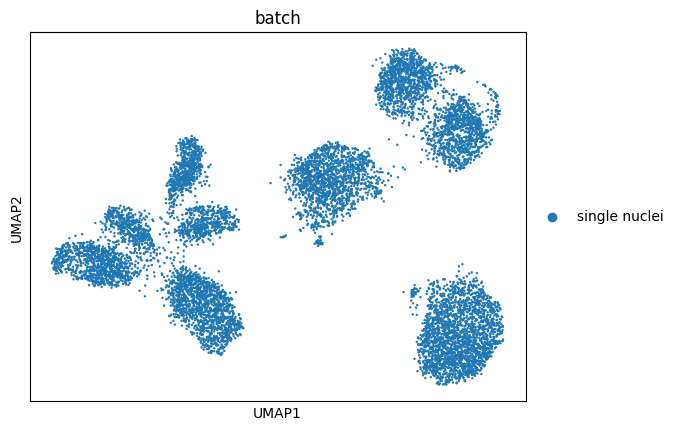

In [ ]:
sc.pp.neighbors(adata_sn_isoform, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata_sn_isoform, min_dist=0.3)
sc.pl.umap(adata_sn_isoform, color=['batch'], wspace=0.55)

In [ ]:
adata_sn_isoform.write_h5ad('adata_sn_isoform-exp.h5ad')

# Leiden Clustering

In [ ]:
sc.tl.leiden(adata_sc_isoform, resolution=0.3, flavor = 'igraph')
sc.tl.leiden(adata_sn_isoform, resolution=0.3, flavor = 'igraph')

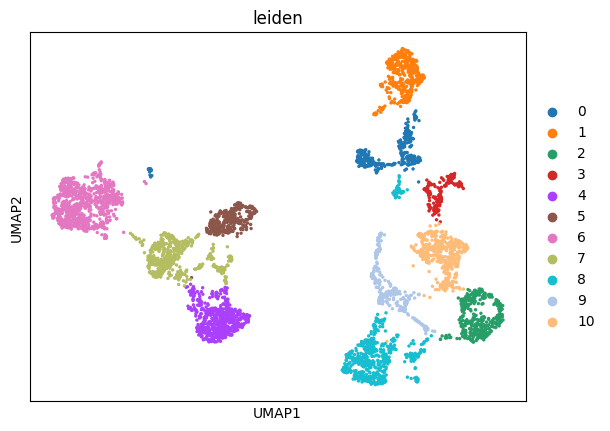

In [ ]:
sc.pl.umap(adata_sc_isoform, color=['leiden'])

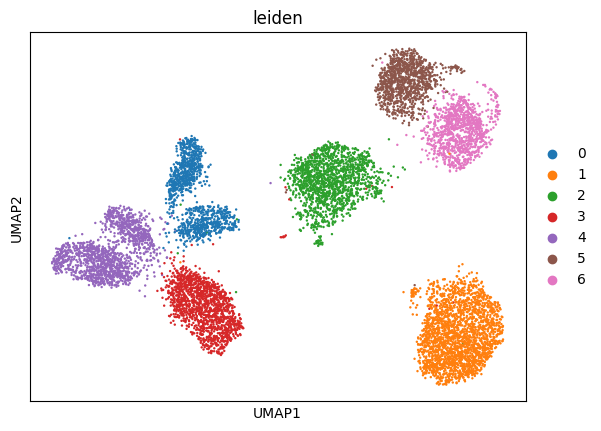

In [ ]:
sc.pl.umap(adata_sn_isoform, color=['leiden'])

# Differential Expression Analysis on sn and sc isoforms

In [ ]:
# logarithmic counts
log_adata_sn_isoform = sc.pp.log1p(adata_sn_isoform, copy = True)
log_adata_sc_isoform = sc.pp.log1p(adata_sc_isoform, copy = True)

# log fc
sc.tl.rank_genes_groups(log_adata_sn_isoform, 'leiden', method='wilcoxon')
sc.tl.rank_genes_groups(log_adata_sc_isoform, 'leiden', method='wilcoxon')

In [ ]:
# saving to data frame isoform x leiden cluster
sn_lfc_df = pd.DataFrame(log_adata_sn_isoform.uns['rank_genes_groups']['logfoldchanges'])
sc_lfc_df = pd.DataFrame(log_adata_sc_isoform.uns['rank_genes_groups']['logfoldchanges'])

# indices
# Get the name of the first cluster from the structured array's field names
first_cluster_name_sn = log_adata_sn_isoform.uns['rank_genes_groups']['names'].dtype.names[0]
sn_lfc_df.index = log_adata_sn_isoform.uns['rank_genes_groups']['names'][first_cluster_name_sn]

first_cluster_name_sc = log_adata_sc_isoform.uns['rank_genes_groups']['names'].dtype.names[0]
sc_lfc_df.index = log_adata_sc_isoform.uns['rank_genes_groups']['names'][first_cluster_name_sc]

#columns
sn_lfc_df.columns = log_adata_sn_isoform.obs['leiden'].unique().astype(str)
sc_lfc_df.columns = log_adata_sc_isoform.obs['leiden'].unique().astype(str)

In [ ]:
print(sn_lfc_df.head())

                          0         1         2         3         4         5  \
ENST00000700073.1  4.006178  2.553894  2.874190  2.075558  2.297915  3.021826   
ENST00000518547.6  2.604177  2.937801  3.092336  2.115055  3.418707  1.791064   
ENST00000513135.5  2.060941  4.560781  2.786886  2.185158  1.490265  0.991455   
ENST00000389680.2  0.535702  2.426534  3.965338  1.819309  1.873902  3.866397   
ENST00000525166.6  2.912104  1.671492  5.474302  1.541846  1.926640  3.010098   

                          6  
ENST00000700073.1  2.593453  
ENST00000518547.6  2.678926  
ENST00000513135.5  4.398795  
ENST00000389680.2  2.004627  
ENST00000525166.6  2.444412  


In [ ]:
print(sc_lfc_df.head())

                          0         1         2         3         4         5  \
ENST00000387347.2  1.618234  4.444424  5.513181  0.904316  5.692472  3.588264   
ENST00000389680.2  1.536117  4.266490  5.438165  2.456095  4.884436  4.190966   
ENST00000361390.2  1.507393  3.026382  3.562369  1.236392  5.317411  4.263779   
ENST00000361227.2  1.271004  6.077047  4.237771  1.453711  5.589753  3.893512   
ENST00000361567.2  1.145582  4.825152  3.948843  0.549767  3.844020  4.751344   

                          6         7         8         9        10  
ENST00000387347.2  7.103166  5.975914  7.850870  5.009641  3.357135  
ENST00000389680.2  5.779813  6.150406  5.058597  5.706432  6.158306  
ENST00000361390.2  4.700024  6.136478  6.987261  6.608992  3.627870  
ENST00000361227.2  4.471385  4.754510  4.668313  4.225350  4.581398  
ENST00000361567.2  4.943157  4.519976  4.958499  4.893903  5.768003  


In [ ]:
# identifying top isoforms expressed in each cluster
top_sc = set(pd.DataFrame(log_adata_sc_isoform.uns['rank_genes_groups']['names']).head(100).values.flatten())
top_sn = set(pd.DataFrame(log_adata_sn_isoform.uns['rank_genes_groups']['names']).head(100).values.flatten())

top_isoforms = list(top_sc.union(top_sn))

lfc_sc_subset = sc_lfc_df.reindex(top_isoforms).dropna()
lfc_sn_subset = sn_lfc_df.reindex(top_isoforms).dropna()

full_corr = pd.concat([lfc_sc_subset, lfc_sn_subset], axis=1).corr()

In [ ]:
n_sc_clusters = lfc_sc_subset.shape[1]
sc_vs_sn_corr = full_corr.iloc[:n_sc_clusters, n_sc_clusters:]

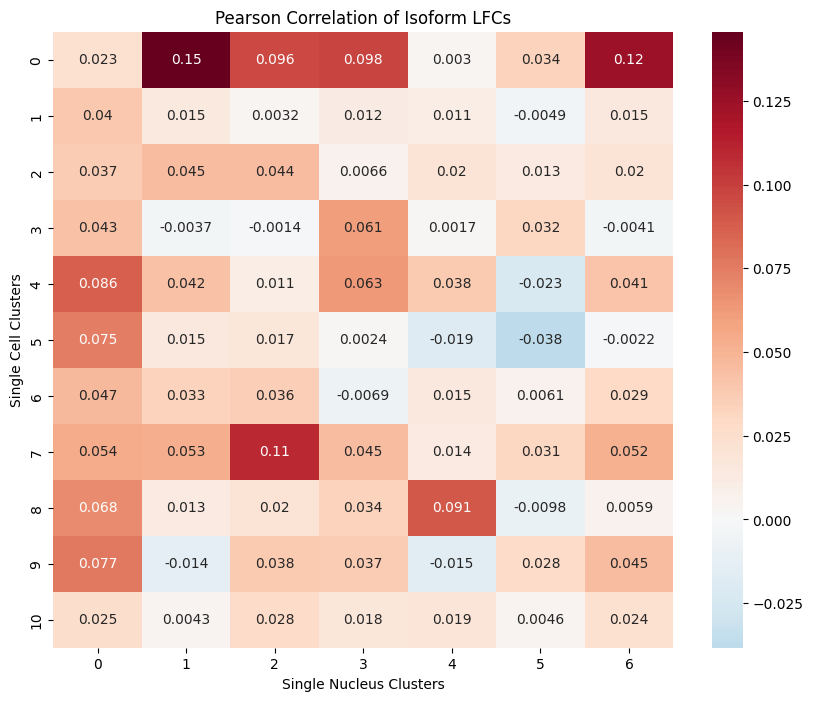

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(sc_vs_sn_corr, annot=True, cmap="RdBu_r", center=0)
plt.xlabel("Single Nucleus Clusters")
plt.ylabel("Single Cell Clusters")
plt.title("Pearson Correlation of Isoform LFCs")
plt.show()